In [1]:
# import liabaray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler

In [2]:
# delete warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read dataset
data=pd.read_csv(r'D:\Deep Learning project & tasks\Datasets\tsla.us.txt')

In [4]:
# disolay first 5 row of data
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [5]:
# disolay last 5 row of data
data.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
1853,2017-11-06,307.00,307.50,299.01,302.78,6482486,0
1854,2017-11-07,301.02,306.50,300.03,306.05,5286320,0
1855,2017-11-08,305.50,306.89,301.30,304.31,4725510,0
1856,2017-11-09,302.50,304.46,296.30,302.99,5440335,0
1857,2017-11-10,302.50,308.36,301.85,302.99,4621912,0


In [6]:
# display information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1858 non-null   object 
 1   Open     1858 non-null   float64
 2   High     1858 non-null   float64
 3   Low      1858 non-null   float64
 4   Close    1858 non-null   float64
 5   Volume   1858 non-null   int64  
 6   OpenInt  1858 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 101.7+ KB


In [7]:
# split data
train_size=int(len(data) * 0.80) # 80% of data --> 1486
print(train_size)

1486


In [8]:
# train data
train_data=data[0 : train_size] # 0 to 1485

In [9]:
train_data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [10]:
train_data.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
1481,2016-05-17,209.05,209.82,204.02,204.66,2303002,0
1482,2016-05-18,209.15,215.31,207.75,211.17,4454848,0
1483,2016-05-19,213.62,216.79,207.30,215.21,6582419,0
1484,2016-05-20,216.99,220.55,216.35,220.28,8635216,0
1485,2016-05-23,219.87,222.60,215.86,216.22,4335487,0


In [11]:
# data length
data_length=len(data)
data_length

1858

In [12]:
# test data
test_data=data[train_size:data_length] # 1486 to 1858 --> 372 row

In [13]:
len(test_data)

372

In [14]:
test_data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
1486,2016-05-24,216.60,218.74,215.18,217.91,2928659,0
1487,2016-05-25,217.91,221.36,216.51,219.58,2514028,0
1488,2016-05-26,220.50,225.26,219.05,225.12,3560997,0
1489,2016-05-27,224.99,225.93,220.75,223.04,3081734,0
1490,2016-05-31,223.04,224.75,221.50,223.23,2046828,0


In [15]:
test_data.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
1853,2017-11-06,307.00,307.50,299.01,302.78,6482486,0
1854,2017-11-07,301.02,306.50,300.03,306.05,5286320,0
1855,2017-11-08,305.50,306.89,301.30,304.31,4725510,0
1856,2017-11-09,302.50,304.46,296.30,302.99,5440335,0
1857,2017-11-10,302.50,308.36,301.85,302.99,4621912,0


In [16]:
# select open column
train_array=train_data.loc[:,['Open']].values

In [17]:
train_array

array([[ 17.  ],
       [ 19.  ],
       [ 25.79],
       ...,
       [213.62],
       [216.99],
       [219.87]])

In [18]:
# select open column
test_array=test_data.loc[:,['Open']].values

In [19]:
test_array

array([[216.6  ],
       [217.91 ],
       [220.5  ],
       [224.99 ],
       [223.04 ],
       [221.48 ],
       [219.59 ],
       [220.   ],
       [218.   ],
       [222.24 ],
       [233.8  ],
       [234.98 ],
       [227.39 ],
       [219.5  ],
       [218.88 ],
       [216.95 ],
       [217.42 ],
       [217.81 ],
       [219.5  ],
       [220.68 ],
       [199.47 ],
       [195.69 ],
       [190.05 ],
       [190.86 ],
       [201.89 ],
       [205.13 ],
       [212.97 ],
       [206.14 ],
       [209.73 ],
       [210.   ],
       [213.1  ],
       [217.8  ],
       [219.96 ],
       [224.1  ],
       [225.5  ],
       [223.12 ],
       [222.52 ],
       [219.64 ],
       [225.   ],
       [226.47 ],
       [226.   ],
       [221.99 ],
       [222.27 ],
       [227.69 ],
       [229.34 ],
       [227.95 ],
       [230.7  ],
       [235.5  ],
       [229.37 ],
       [227.37 ],
       [225.69 ],
       [230.   ],
       [228.   ],
       [226.82 ],
       [228.24 ],
       [22

In [20]:
# scale train_array
s=MinMaxScaler()

train_scaled=s.fit_transform(train_array)

In [21]:
time_step=40

x_train=[] # sequence of data points
y_train=[] # target value (next time step)

for i in range(time_step, len(train_scaled)):
    x_train.append(train_scaled[i-time_step:i, 0]) # 1486 / 40
    y_train.append(train_scaled[i,0])

In [22]:
# return x_train , y_train to array
x_train=np.array(x_train)
y_train=np.array(y_train)

In [23]:
x_train.shape

(1446, 40)

In [24]:
y_train.shape

(1446,)

In [25]:
# reshape x_train
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1446, 40, 1)

In [26]:
#Build RNN Model
rnn_model = Sequential()

#add simple rnn layer with input shape
rnn_model.add(SimpleRNN(50, activation = 'tanh', return_sequences = True,
                       input_shape = (x_train.shape[1], 1)))

#add dropout layer ----> prevent overfitting
rnn_model.add(Dropout(0.2))

#add simple rnn layer 
rnn_model.add(SimpleRNN(50, activation = 'tanh', return_sequences = True))

#add dropout layer 
rnn_model.add(Dropout(0.2))

#add simple rnn layer 
rnn_model.add(SimpleRNN(50))

#add dropout layer 
rnn_model.add(Dropout(0.2))

#add output layer
rnn_model.add(Dense(1))

In [27]:
# summary of model
rnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 40, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 40, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 40, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# model compile
rnn_model.compile(optimizer='adam',
                 loss='mean_squared_error')

In [29]:
# fiting model
rnn_model.fit(x_train, y_train, epochs=40)

Epoch 1/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1787
Epoch 2/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0583
Epoch 3/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0355
Epoch 4/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0250
Epoch 5/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0179
Epoch 6/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0173
Epoch 7/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0132
Epoch 8/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0124
Epoch 9/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0108
Epoch 10/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0089
Epoch 11/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0088
Epoch 12/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0079
Epoch 13/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0067
Epoch 14/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0074
Epoch 15/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0070
Epoc

In [30]:
total_data=pd.concat((data['Open'],test_data['Open']),axis=0)

In [31]:
total_data

0        17.00
1        19.00
2        25.79
3        25.00
4        23.00
         ...  
1853    307.00
1854    301.02
1855    305.50
1856    302.50
1857    302.50
Name: Open, Length: 2230, dtype: float64

In [32]:
inputs=total_data[len(total_data) - len(test_data) - time_step:].values.reshape(-1,1)

In [33]:
# scaling inputs
inputs = s.transform(inputs)

In [34]:
inputs.shape

(412, 1)

In [35]:
x_test=[]
for i in range(time_step, 412):
    x_test.append(inputs[i - time_step:i - 0])

In [36]:
x_test=np.array(x_test)
x_test.shape

(372, 40, 1)

In [37]:
# prediction
rnn_pred=rnn_model.predict(x_test) 

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


In [38]:
rnn_pred

array([[0.9915694 ],
       [0.8992943 ],
       [0.82066226],
       [0.791252  ],
       [0.76170135],
       [0.7643141 ],
       [0.7556087 ],
       [0.740884  ],
       [0.749983  ],
       [0.73269695],
       [0.74599165],
       [0.7486911 ],
       [0.76963454],
       [0.7699007 ],
       [0.7550215 ],
       [0.764563  ],
       [0.7394333 ],
       [0.73989236],
       [0.72875553],
       [0.72610265],
       [0.7348728 ],
       [0.71648616],
       [0.69677323],
       [0.6713327 ],
       [0.658178  ],
       [0.66814   ],
       [0.6666609 ],
       [0.68760586],
       [0.69632804],
       [0.6919553 ],
       [0.70772654],
       [0.6994375 ],
       [0.70956916],
       [0.71550924],
       [0.7311615 ],
       [0.7566249 ],
       [0.7543567 ],
       [0.7699109 ],
       [0.7588673 ],
       [0.762086  ],
       [0.7601032 ],
       [0.7634824 ],
       [0.76934797],
       [0.76190597],
       [0.7680135 ],
       [0.7698682 ],
       [0.76882523],
       [0.776

In [39]:
#inverse scaling
rnn_pred=s.inverse_transform(rnn_pred)

In [40]:
rnn_pred

array([[285.38086],
       [260.32538],
       [238.97443],
       [230.98866],
       [222.96477],
       [223.67422],
       [221.31042],
       [217.31224],
       [219.7829 ],
       [215.0892 ],
       [218.69911],
       [219.4321 ],
       [225.11888],
       [225.19113],
       [221.151  ],
       [223.7418 ],
       [216.91833],
       [217.04298],
       [214.019  ],
       [213.29866],
       [215.68002],
       [210.6875 ],
       [205.33484],
       [198.42699],
       [194.85507],
       [197.56006],
       [197.15845],
       [202.84563],
       [205.21396],
       [204.02664],
       [208.30899],
       [206.05827],
       [208.80933],
       [210.42223],
       [214.67229],
       [221.58636],
       [220.97047],
       [225.19391],
       [222.19525],
       [223.06921],
       [222.53084],
       [223.44838],
       [225.04106],
       [223.02034],
       [224.67871],
       [225.18231],
       [224.89912],
       [226.92076],
       [228.5758 ],
       [229.04988],


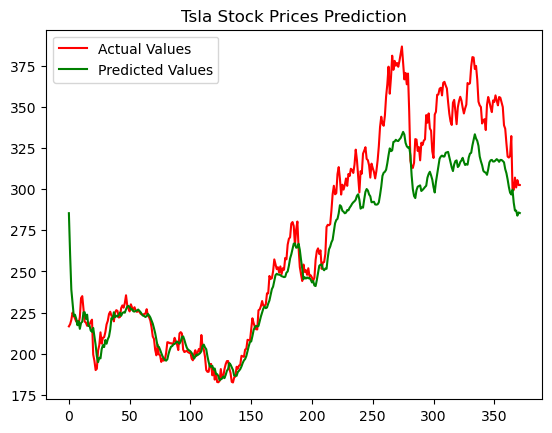

In [41]:
plt.plot(test_array,color='r',label='Actual Values')
plt.plot(rnn_pred,color='g',label='Predicted Values')
plt.title('Tsla Stock Prices Prediction')
plt.legend()
plt.show()

In [42]:
#Build LSTM Model
lstm_model = Sequential()

#add LSTM layer with input shape
lstm_model.add(LSTM(50, activation = 'tanh', return_sequences = True,
                       input_shape = (x_train.shape[1], 1)))

#add dropout layer ----> prevent overfitting
lstm_model.add(Dropout(0.2))

#add LSTM layer 
lstm_model.add(LSTM(50, activation = 'tanh', return_sequences = True))

#add dropout layer 
lstm_model.add(Dropout(0.2))

#add LSTM layer 
lstm_model.add(LSTM(50))

#add dropout layer 
lstm_model.add(Dropout(0.2))

#add output layer
lstm_model.add(Dense(1))

In [43]:
# model compile
lstm_model.compile(optimizer='adam',
                 loss='mean_squared_error')

In [ ]:
# fiting model
lstm_model.fit(x_train, y_train, epochs=40)

Epoch 1/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 0.0550
Epoch 2/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0053
Epoch 3/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0041
Epoch 4/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0044
Epoch 5/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0044
Epoch 6/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0040
Epoch 7/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0039
Epoch 8/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0041
Epoch 9/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0035
Epoch 10/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0035
Epoch 11/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0033
Epoch 12/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0033
Epoch 13/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0041
Epoch 14/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0031
Epoch 15/40
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0033
Epoc

In [ ]:
lstm_pred=lstm_model.predict(x_test)

In [ ]:
#inverse scaling
lstm_pred=s.inverse_transform(lstm_pred)

In [ ]:
lstm_pred

In [ ]:
plt.plot(test_array,color='r',label='Actual Values')
plt.plot(lstm_pred,color='g',label='Predicted Values')
plt.title('Tsla Stock Prices Prediction')
plt.legend()
plt.show()

In [ ]:
plt.plot(test_array,color='r',label='Actual Values')
plt.plot(rnn_pred,color='g',label='RNN Predicted Values')
plt.plot(lstm_pred,color='blue',label='LSTM Predicted Values')
plt.title('Tsla Stock Prices Prediction')
plt.legend()
plt.show()